<a href="https://www.kaggle.com/code/notsau/classification-of-reviews-in-the-restaurant?scriptVersionId=161459602" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/restaurant/restaurant.csv")

# EDA

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10417 entries, 0 to 10416

Data columns (total 10 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   Unnamed: 0   10417 non-null  int64 

 1   review_id    10417 non-null  object

 2   user_id      10417 non-null  object

 3   business_id  10417 non-null  object

 4   stars        10417 non-null  int64 

 5   useful       10417 non-null  int64 

 6   funny        10417 non-null  int64 

 7   cool         10417 non-null  int64 

 8   text         10417 non-null  object

 9   date         10417 non-null  object

dtypes: int64(5), object(5)

memory usage: 814.0+ KB


In [5]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [ ]:
# Feature Engineering

In [6]:
df['date'] = pd.to_datetime(df['date'])

# Saat bilgisini kaldırmak için "date" sütununu yalnızca tarih kısmına dönüştürün
df['date'] = df['date'].dt.date

In [7]:
df.drop(["Unnamed: 0","review_id","user_id","business_id"],axis=1,inplace=True)

In [8]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28


In [9]:
# Rakamları kaldırma işlemi
df["text"] = df["text"].str.replace("\d+", "", regex=True)

# Küçük harfe dönüştürme işlemi
df["text"] = df["text"].str.lower()

# Noktalama işaretlerini kaldırma işlemi
df["text"] = df["text"].str.replace("[^\w\s]", "", regex=True)

# Satır başları ve boşlukları kaldırma işlemi
df["text"] = df["text"].str.replace("[\r\n\s]+", " ", regex=True)

In [10]:
df["text"]

0        after getting food poisoning at the palms hote...
1        a feast worthy of gods baccarnal buffet in cae...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could my...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy this buffet was one for ...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10417, dtype: object

In [11]:
iyivekotu=df[ (df['stars']==5) | (df['stars']==1) ]
#iyi ve kotu olanları, 1 yıldız alan ve 5 yıldız alanlara eşitledik

In [12]:
iyivekotu.head(10)

,stars,useful,funny,cool,text,date
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28
5,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01
8,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27
10,5,2,0,0,best buffet as of march beats wicked spoon and...,2014-04-01
11,5,0,0,0,we tried bacchanal for lunch on a wednesday in...,2013-02-21
12,1,0,0,0,food is fine better than most buffets when i r...,2015-07-16
13,5,3,1,1,amazing buffet went at ish on a thursday and b...,2013-04-10
14,5,0,1,1,if this is what heaven is like then im going t...,2014-02-05


In [13]:
iyivekotu.reset_index(drop=True,inplace=True)
#index numaralarını sıfırladık

In [14]:
iyivekotu.head(10)
#artık 0 1 2 3.. diye gidiyor

,stars,useful,funny,cool,text,date
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04
1,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19
2,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28
3,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01
4,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27
5,5,2,0,0,best buffet as of march beats wicked spoon and...,2014-04-01
6,5,0,0,0,we tried bacchanal for lunch on a wednesday in...,2013-02-21
7,1,0,0,0,food is fine better than most buffets when i r...,2015-07-16
8,5,3,1,1,amazing buffet went at ish on a thursday and b...,2013-04-10
9,5,0,1,1,if this is what heaven is like then im going t...,2014-02-05


### TTS

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification algoritmasi
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
x=iyivekotu["text"]
y=iyivekotu["stars"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [18]:
x[0]
#1. yorumu getirdi

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we ate the seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it though the prime rib was the best ive ever had i loved the sweet potato tots i even have pho the music was great and so was our server alma he was a older gentleman with a mustache and was very attentive and delightful i will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [19]:
vect=CountVectorizer(ngram_range=(1,2),stop_words="english")
                     #ngram= kelimeleri 1,1; 2,2 okuyarak bidaha dene

In [20]:
x=vect.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [22]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [23]:
nb=MultinomialNB()

In [24]:
model=nb.fit(x_train,y_train)

In [25]:
pred=nb.predict(x_test)

In [26]:
accuracy_score(pred,y_test)

0.9

In [27]:
#!pip install textblob
import nltk
#nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

In [28]:
TextBlob("text").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [29]:
# SentimentIntensityAnalyzer nesnesini oluşturun
analyzer = SentimentIntensityAnalyzer()

# Sınıflandırma işlemini yapmak için bir fonksiyon tanımlayın
def classify_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Metin sütunundaki her bir değeri sınıflandırın
df['Sentiment'] = df['text'].apply(classify_sentiment)

In [30]:
df.head()

,stars,useful,funny,cool,text,date,Sentiment
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04,Positive
1,4,39,21,29,a feast worthy of gods baccarnal buffet in cae...,2014-01-17,Positive
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08,Negative
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19,Negative
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28,Positive


In [49]:
pozitif = df.loc[df["Sentiment"] == 'Positive', 'text']
negatif = df.loc[df["Sentiment"] == 'Negative', 'text']

In [50]:
pozitif.head()

0    after getting food poisoning at the palms hote...
1    a feast worthy of gods baccarnal buffet in cae...
4    i would give this infinite stars if i could my...
5    really enjoyed everything they had to offer it...
6    came for dinner at per person at around pm pra...
Name: text, dtype: object

In [51]:
#pip install wordcloud
from wordcloud import WordCloud

In [52]:
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,stopwords="english")
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

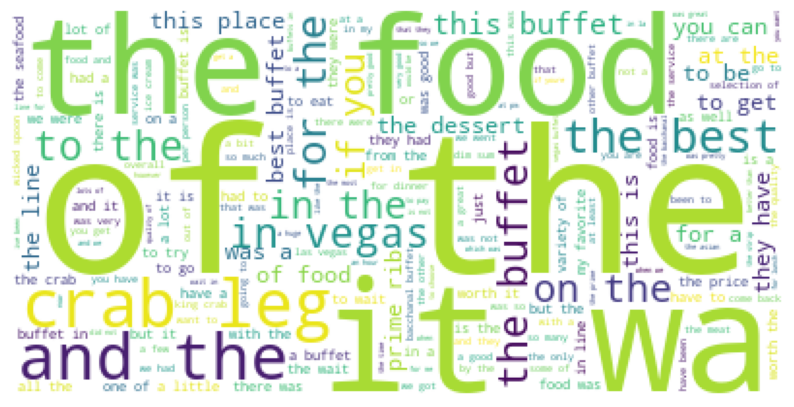

In [53]:
wc(pozitif,"white")

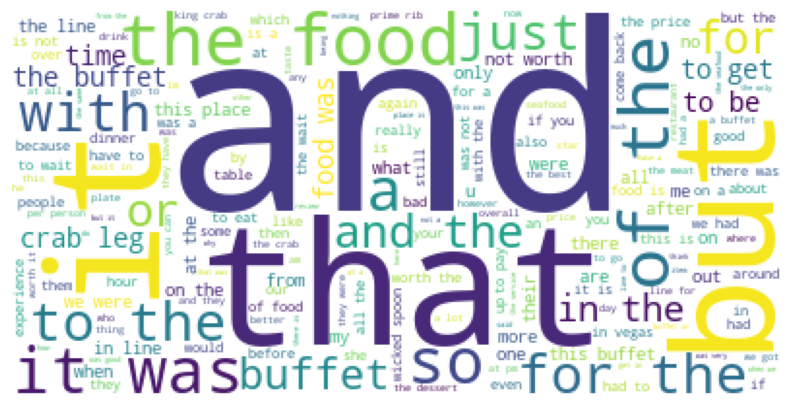

In [54]:
wc(negatif,"white")